# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [16]:
# imports
import warnings 
warnings.filterwarnings('ignore')

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [17]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [18]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [19]:
# Read the census data into pandas dataframe

file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [20]:
# Import the neighbourhoods location data into Pandas DataFrames

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [21]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_10_expensive_neighbourhoods = to_data.groupby(['neighbourhood']).mean().reset_index().sort_values(by=['average_house_value'],ascending=False).head(10).reset_index(drop=True)


# Calculate the mean number of dwelling types units per year
# YOUR CODE HERE!
housing_units = to_data.groupby('year').mean().iloc[:,:8]
df_dwelling_units = housing_units.T

# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
df_avg_costs = to_data[['shelter_costs_owned','shelter_costs_rented']].groupby(['year']).mean()


### Panel Visualization Functions

In [62]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
   
    # YOUR CODE HERE!
    api_token="pk.eyJ1Ijoic2lkZGhkb3NpIiwiYSI6ImNreGVudnpnNjA3NXcycG54bXF4MmRodzMifQ.8yVH47iUqi6nwLQR_LUB1g"
    px.set_mapbox_access_token(api_token)
    avg_by_neighbourhood = to_data.groupby(['neighbourhood']).mean().reset_index()
    neighbourhood_df = pd.merge(df_neighbourhood_locations,avg_by_neighbourhood,on='neighbourhood',how='inner')
    
    fig = px.scatter_mapbox(neighbourhood_df, lat="lat", lon="lon", color="average_house_value", size="average_house_value",
                  color_continuous_scale=px.colors.cyclical.IceFire,height=400,width=800,title='Averange House Values in Toronto')
    return fig

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    # YOUR CODE HERE!
    fig = plt.figure(figsize=(5,3))
    plt.bar(data.index, data.values, color =color)
 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.close(fig)
    return fig

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    # YOUR CODE HERE!
    fig = plt.figure()
    plt.plot(data.index,data.values,color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.close(fig)
    return fig

def average_house_value():
    """Average house values per year."""
    # YOUR CODE HERE!
    avg_house_val_per_yr = to_data[['average_house_value']].groupby(['year']).mean()
    fig = create_line_chart(avg_house_val_per_yr['average_house_value'], 
                      'Average House Value in Toronto', 
                      'Year', 'Avg House Value', color='blue')
    return fig

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # YOUR CODE HERE!
    avg_house_val_by_neighbourhood = to_data[['neighbourhood','average_house_value']].groupby(['year','neighbourhood']).mean().reset_index()
    fig = avg_house_val_by_neighbourhood.hvplot(x='year',y='average_house_value',kind='line',groupby='neighbourhood')
    return fig

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    num_dwelling_type_by_neighbourhood = to_data.groupby(['year','neighbourhood']).sum().reset_index()
    dwelling_type_col = ['single_detached_house',
                     'apartment_five_storeys_plus',
                     'movable_dwelling','semi_detached_house',
                     'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']
    fig = num_dwelling_type_by_neighbourhood.hvplot(x='year',y=dwelling_type_col,
                                          kind='bar',groupby='neighbourhood',
                                          rot=90,xlabel='Year',ylabel='Dwelling Type Units',width=650,height=500)
    return fig
    
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!
    avg_house_val_by_neighbourhood = to_data[['neighbourhood','average_house_value']].groupby(['year','neighbourhood']).mean().reset_index()
    fig = px.bar(avg_house_val_by_neighbourhood, x="neighbourhood", y="average_house_value",
             color='average_house_value', facet_row="year",
            height=1000,width=900,
             title='Avgrage House Value per Neighbourhood')
    return fig

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    # YOUR CODE HERE!
    top_10_expensive_neighbourhoods = to_data.groupby(['neighbourhood']).mean().reset_index().sort_values(by=['average_house_value'],ascending=False).head(10).reset_index(drop=True)
    fig = top_10_expensive_neighbourhoods.hvplot(x='neighbourhood',y='average_house_value',
                                      xlabel='Neighbourhood',ylabel='Avg. House Value',title = 'Top 10 Expensive Neighbourhood in Toronto',
                                       rot=90,kind='bar',width=650,height=500)
    return fig

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!
    filter_df = to_data[to_data.neighbourhood.isin(top_10_expensive_neighbourhoods.neighbourhood)]
    most_expensive_neighbourhood_per_year = filter_df.groupby(['year','neighbourhood']).sum().reset_index()
    
    fig = px.sunburst(most_expensive_neighbourhood_per_year, path=['year', 'neighbourhood'], values='shelter_costs_owned',
                  color='shelter_costs_owned',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(most_expensive_neighbourhood_per_year['shelter_costs_owned'], weights=most_expensive_neighbourhood_per_year['shelter_costs_owned'])
                 ,height=600,width=800,title='Cost Analysis of Most Expensive Neighbourhoods in Toronto per Year')
    return fig

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [63]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title = "# Real Estate Analysis of Toronto from 2001 to 2016"
#title = pn.Column(title, pn.widgets.FloatSlider())

# Define a welcome text
# YOUR CODE HERE!
text = 'This dashboard present a visual analysis of historical house values, dwelling types per neighbourhood and dwelling costs in Toronto, Ontario according to census data from \
2001 to 2016. You can nativate through the tabs above to explore more details about the evolution of the real estate market \
on the 6 across these years.'

# Create a tab layout for the dashboard
# YOUR CODE HERE!

#Define tab 1
tab_1 = pn.Column(text,neighbourhood_map)

bar_fig1 = create_bar_chart(df_dwelling_units[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")
bar_fig2 = create_bar_chart(df_dwelling_units[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "Blue")
bar_fig3 = create_bar_chart(df_dwelling_units[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "yellow")
bar_fig4 = create_bar_chart(df_dwelling_units[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "green")

#Define tab 2
tab_2 = pn.Column((pn.Row(bar_fig1,bar_fig2)),(pn.Row(bar_fig3,bar_fig4)))

#Define tab 3
line_fig1 = create_line_chart(df_avg_costs['shelter_costs_owned'], 
                      'Average Monthly Shelter Cost for Owned Dwellings in Toronto', 
                      'Year', 'Avg Monthly Shelter Costs', color='blue')
line_fig2 = create_line_chart(df_avg_costs['shelter_costs_rented'], 
                      'Average Monthly Shelter Cost for Rented Dwellings in Toronto', 
                      'Year', 'Avg Monthly Shelter Costs', color='yellow')
line_fig3 = average_house_value()

tab_3 = pn.Column(line_fig1,line_fig2,line_fig3)

#Define tab 4
tab_4_fig1 = average_value_by_neighbourhood()
tab_4_fig2=number_dwelling_types()
tab_4_fig3 = average_house_value_snapshot()

tab_4 = pn.Row(pn.Column(tab_4_fig1,tab_4_fig2),tab_4_fig3)

#Define tab 5
tab_5_fig1 = top_most_expensive_neighbourhoods()
tab_5_fig2= sunburts_cost_analysis()

tab_5 = pn.Row(tab_5_fig1,tab_5_fig2)

# Combine all tabs
Tab = pn.Tabs(('Welcome',tab_1),
        ('Yearly Market Analysis',tab_2),
        ('Shelter Cost Vs House Value',tab_3),
        ('Neighbourhood Analysis',tab_4),
        ('Top Expensive Neighbourhoods',tab_5))


# Create the main dashboard
# YOUR CODE HERE!
dashboard = pn.Column(title,Tab)

## Serve the Panel Dashboard

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive19950')
        [1] Column
            [0] Row
                [0] Matplotlib(Figure)
                [1] Matplotlib(Figure)
            [1] Row
                [0] Matplotlib(Figure)
                [1] Matplotlib(Figure)
        [2] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [3] Row
            [0] Column
                [0] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
            [1] Plotly(Figure, visible=False)
        [4] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure, visible=False)
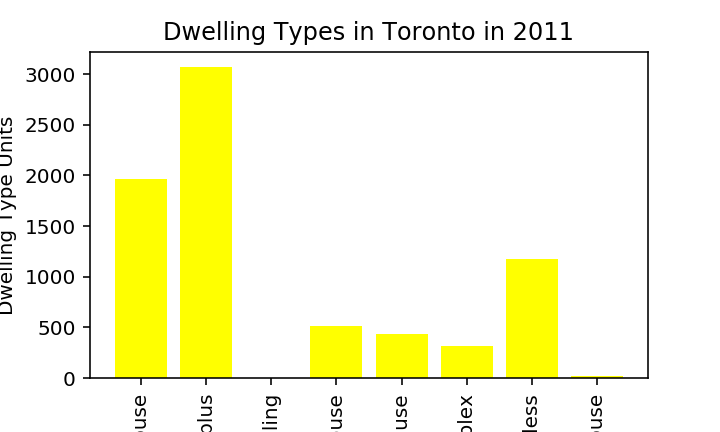
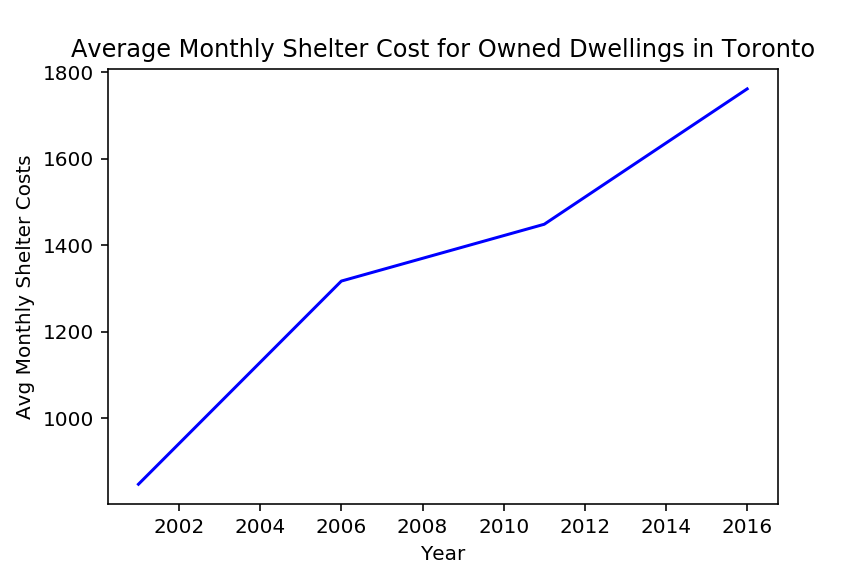
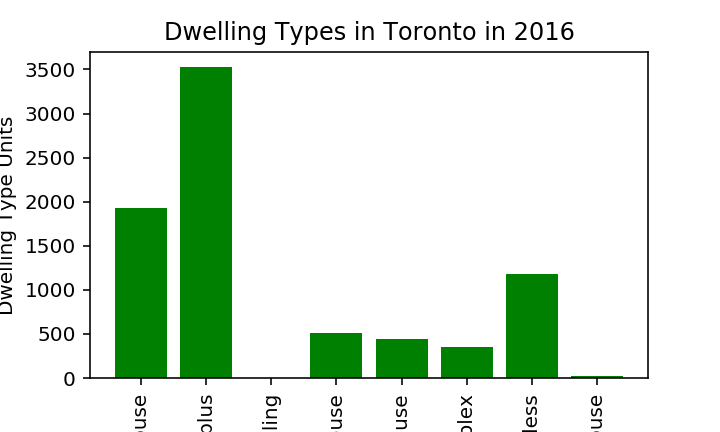
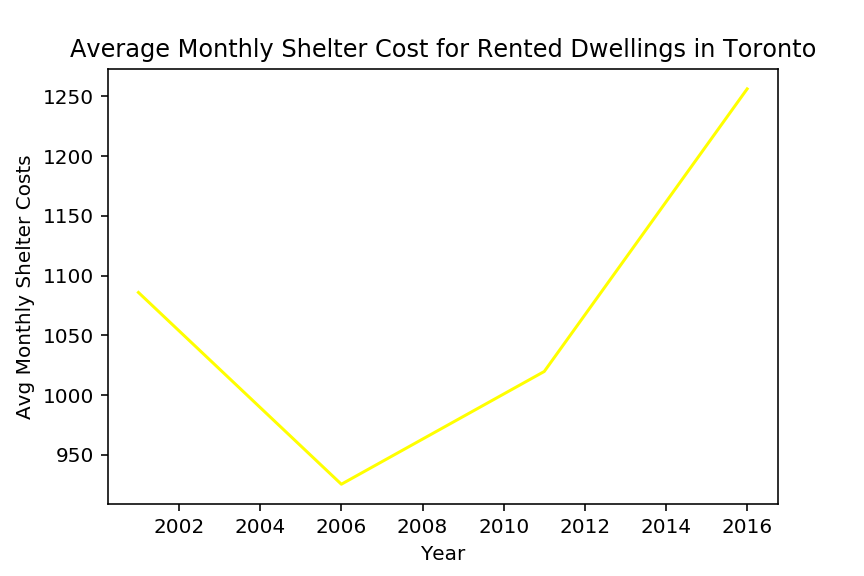
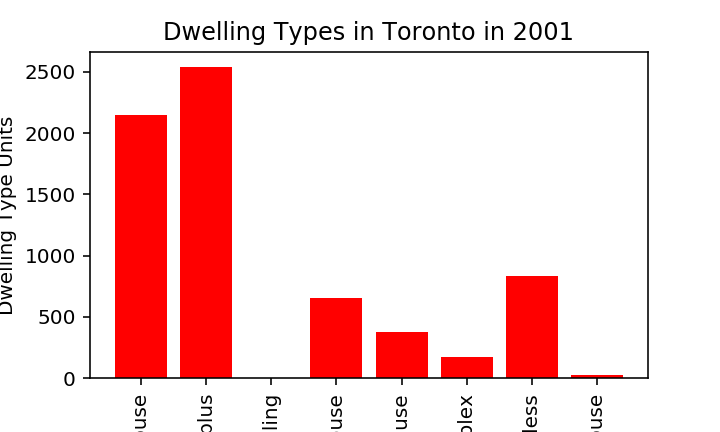
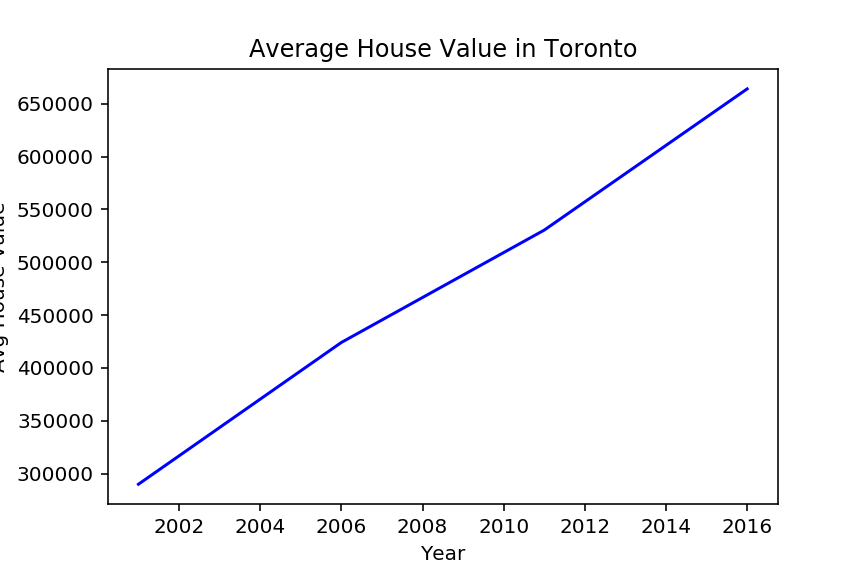
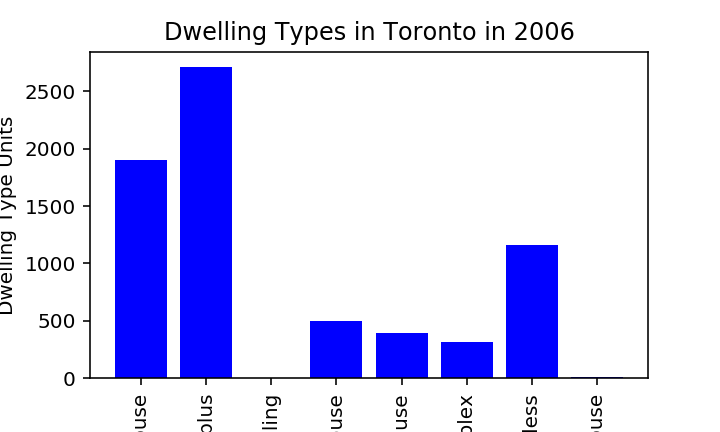

In [65]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

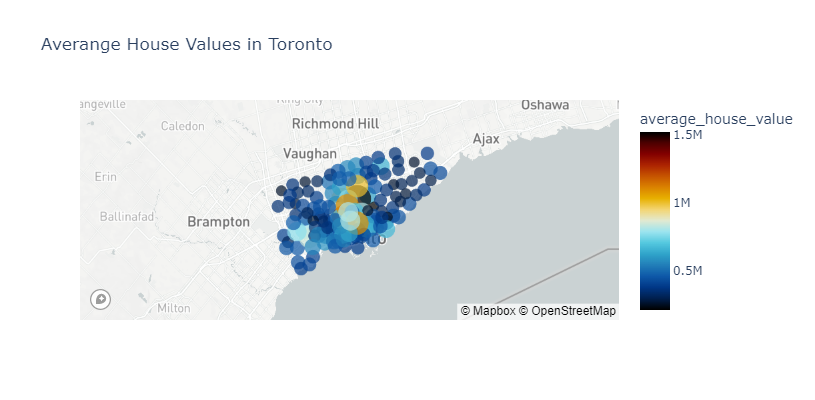

In [106]:
neighbourhood_map().show()

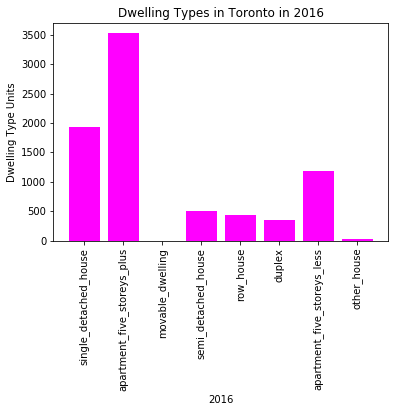

In [109]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
create_bar_chart(df_dwelling_units[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
create_bar_chart(df_dwelling_units[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
create_bar_chart(df_dwelling_units[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
create_bar_chart(df_dwelling_units[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

C:\Users\Siddhesh\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Siddhesh\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



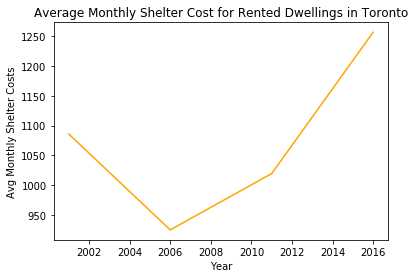

In [110]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

C:\Users\Siddhesh\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Siddhesh\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



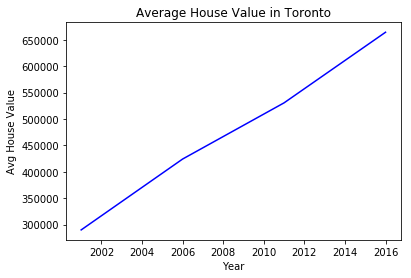

In [111]:
average_house_value()

In [112]:
average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [113]:
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

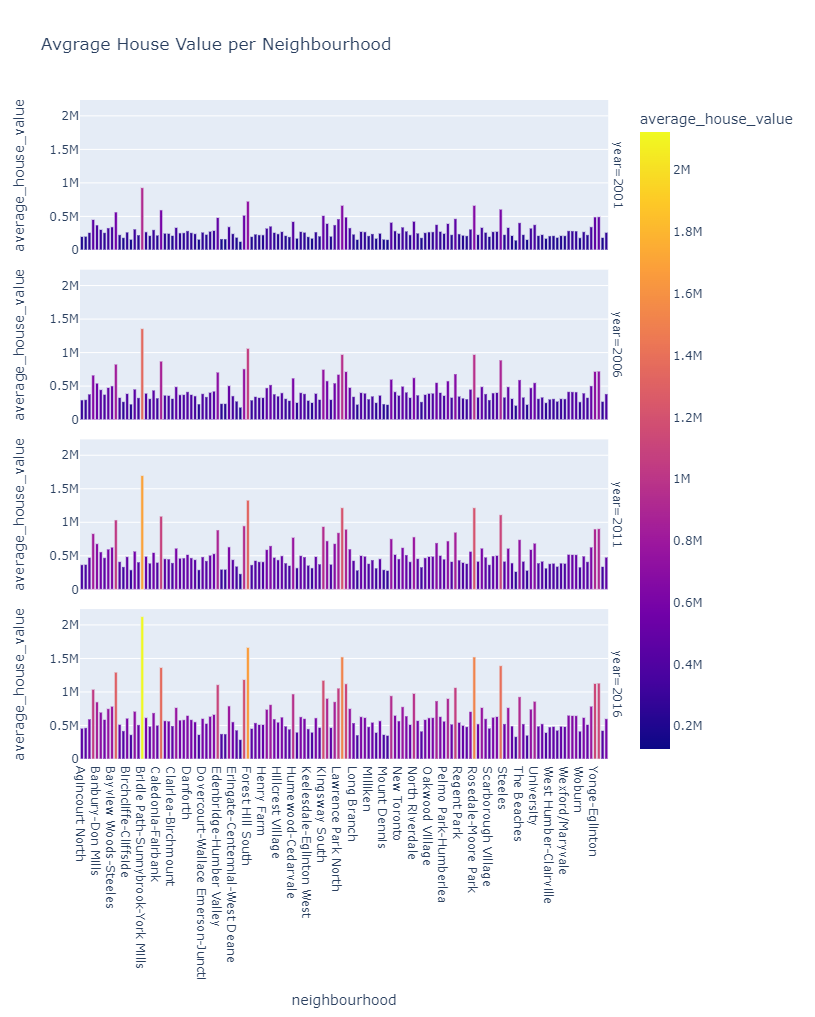

In [114]:
average_house_value_snapshot()

In [115]:
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

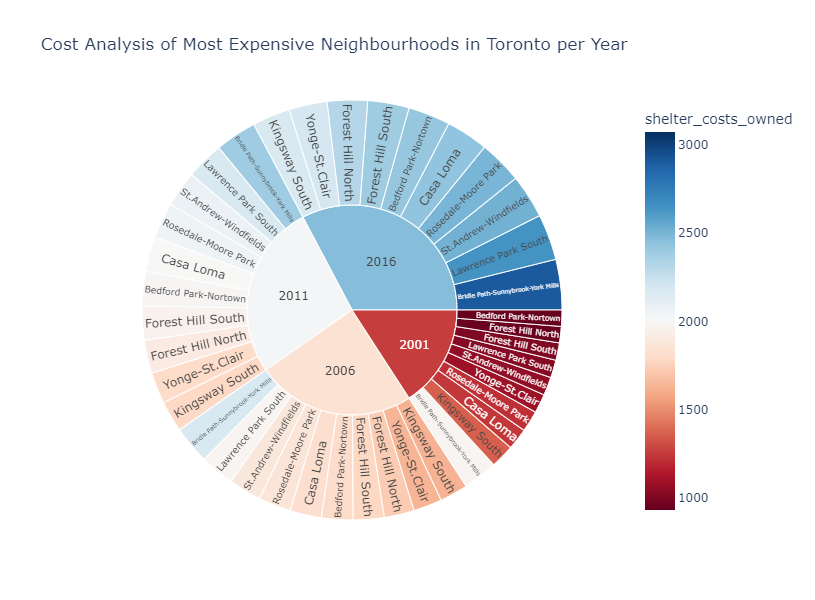

In [116]:
sunburts_cost_analysis()